# Sistemas Electrónicos para Comunicaciones Digitales
# Ejercicios de sistemas de comunicación inalámbrica

Tabla 1. Características del módulo Bluettoth BlueCore2 de CSR configurado en modo de monitorización o sondeo de bajo consumo con una conexión ACL (*Asynchronous Connectionless Link*)
>Packet Type | Packet Size (data bytes) | Data rate (kbps)
>--- | --- | ---
>DH1 (1 slot)  |  28 | 172.8
>DH3 (3 slots) | 183 | 585
>DH5 (5 slots) | 341 | 733.9

> Sniff interval ($T_{sniff}$) (ms) | $I_{sleep}$ (mA) | $I_{act}$ (mA)
> --- | --- | ---
>40   | 4.0 | 50
>470  | 2.5 | 50
>1280 | 0.5 | 50

Tabla 2. Características del módulo ZigBee MC1323x de Freescale
> $I_{sleep}$ ($\mu$A) | $I_{act}$ (mA)
> --- | ---
>   1 | 30






## **Ejercicio 1**

Se desea realizar una red inalámbrica de sensores distribuidos para monitorizar una serie de variables en distintos puntos de un área de medida. Cada nodo sensor del sistema realizará una adquisición cada $100\,ms$, codificará la información utilizando $20\,bytes$, empaquetará dicha información y la enviará periódicamente ($T_{per}$) al nodo coordinador o maestro. Para realizar una estimación, se considerará que los nodos sensores se alimentan con una batería con una capacidad nominal de $100\,mA·h$ y que el consumo está dominado por el módulo de comunicación inalámbrica.



### Apartado a)
a) Si se utiliza un módulo Bluetooth BlueCore2 de CSR para realizar la comunicación, en modo de sondeo de bajo consumo con una conexión ACL, determinar la duración de la batería del nodo sensor o esclavo cuando se configura la red con unperiodo de sondeo o monitorización de datos, $T_{per} = T_{sniff} = 470\,ms$, y se empaquetan los datosutilizando Packet Type DH3.

### Solución

#### Tasa de producción de datos
* Periodo de muestro: $T_{samplig}=T_s=100\,ms$
* Datos por muestra: $d=20\,bytes\ per\ sample$
* Tasa de producción de datos: $DR=d/T_{s}=\frac{20 bytes}{100 ms} = 200\,Bps\,[bytes/s] = 1600\,bps\,[bits/s]$


In [1]:
import numpy as np
Ts=100e-3
d=20
DR=8*d/Ts
DR

1600.0

#### Bluetooth BlueCore2. Packet Type DH3 ($183\,bytes$ y $585\,kbps$):
* Periodo de sondeo de datos: $T_{per}=470\,ms$
* Tasa de transmisión de datos: $b = 585\,kbps$

#### Tamaño del paquete:

* $Samples\_per\_packet=T_{per}/T_s=\frac{470}{100}=4,7\,samples\ per\ packet$ _(en media, unos de 4 muestras y en otros de 5)_
* $Bytes\_per\_packet = \frac{d · T_{per}}{T_s} = DR_{[Bps]} · T_{per} = \frac{20 · 470}{100} = 94\,bytes$

In [2]:
Tper = 470e-3
b_bt = 585000
Samples_per_packet = Tper / Ts
Bytes_per_packet = d * Samples_per_packet
print(Samples_per_packet, Bytes_per_packet)

4.699999999999999 93.99999999999999


#### Tiempo activo de transmisión:

* $T_{act} = \frac{8 · Bytes\_per\_packet}{b} = \frac{DR_{[bps]} · T_{per}}{b}= 1,285\ ms$
* $T_{sleep} = T_{per}-T_{act} = 468,715 \ ms$

In [3]:
Tact_bt = DR * Tper / b_bt
Tsleep_bt = Tper - Tact_bt
print(Tact_bt, Tsleep_bt)

0.0012854700854700854 0.4687145299145299


#### Corriente consumida media:
* Corriente consumida en modo activo: $I_{act} = 50\ mA$
* Corriente consumida en modo *sleep*: $I_{sleep} = 2,5\ mA$

![Consumos](https://raw.githubusercontent.com/feruhf/secd_gett_uvigo/master/images/grafica_consumo.png)

* Corriente media consumida: $I_{av} = \frac{I_{act}·T_{act}+I_{sleep}·T_{sleep}}{T_{per}}=2,63\ mA$

In [4]:
Iact_bt   = 50e-3
Isleep_bt = 2.5e-3
Iav_bt = (Iact_bt*Tact_bt + Isleep_bt*Tsleep_bt)/Tper
Iav_bt

0.0026299145299145303

#### Duración de la batería
* Capacidad de la batería: $W_{bat}=100\ mA·h$
* Duración de la batería: $T_{work}=W_{bat}/I_{av}=\frac{100\ mA·h}{2,61\ mA} = 38,02\ horas = 1,58\ días$

In [5]:
Wbar = 100e-3 # A·h
Twork_h_bt = Wbar / Iav_bt
Twork_d_bt = Twork_h_bt/24
print(Twork_h_bt, Twork_d_bt)

38.02404939876503 1.5843353916152096


### Apartado b)
Si se utiliza un módulo ZigBee MC1323x de Freescale para realizar la comunicación, con una tasa efectiva de datos de 9600 bps, considerando un consumo medio en modo activo (transmisión) $I_{act} = 30\ mA$, y un consumo medio en modo de reposo $I_{sleep} = 1\ \mu A$. Determinar la duración de la batería del nodo sensor o esclavo cuando se configura la red con un periodo de sondeo, $T_{per} = 470\ ms$.

### Solución

#### ZigBee MC1323x ($9600\,bps$):
* Periodo de sondeo de datos: $T_{per}=470\,ms$
* Tasa de transmisión de datos: $b = 9600\,bps$

#### Tamaño del paquete:

* $Samples\_per\_packet=T_{per}/T_s=\frac{470}{100}=4,7\,samples\ per\ packet$ *(en media, unos de 4 muestras y en otros de 5)*
* $Bytes\_per\_packet = \frac{d · T_{per}}{T_s} = DR_{[Bps]} · T_{per} = \frac{20 · 470}{100} = 94\,bytes$

In [6]:
Tper = 470e-3
b_zb = 9600
#Samples_per_packet = Tper / Ts
#Bytes_per_packet = d * Samples_per_packet
print(Samples_per_packet, Bytes_per_packet)

4.699999999999999 93.99999999999999


#### Tiempo activo de transmisión:

* $T_{act} = \frac{8 · Bytes\_per\_packet}{b} = \frac{DR_{[bps]} · T_{per}}{b}= 78,33\ ms$
* $T_{sleep} = T_{per}-T_{act} = 391,67\ ms$

In [7]:
Tact_zb = DR * Tper / b_zb
Tsleep_zb = Tper - Tact_zb
print(Tact_zb, Tsleep_zb)

0.07833333333333334 0.3916666666666666


#### Corriente consumida media:
* Corriente consumida en modo activo: $I_{act} = 30\ mA$
* Corriente consumida en modo *sleep*: $I_{sleep} = 1\ \mu A$
* Corriente media consumida: $I_{av} = \frac{I_{act}·T_{act}+I_{sleep}·T_{sleep}}{T_{per}}= 5\ mA$

In [8]:
Iact_zb   = 30e-3
Isleep_zb = 1e-6
Iav_zb = (Iact_zb*Tact_zb + Isleep_zb*Tsleep_zb)/Tper
Iav_zb

0.005000833333333334

#### Duración de la batería
* Capacidad de la batería: $W_{bat}=100\ mA·h$
* Duración de la batería: $T_{work}=W_{bat}/I_{av}=\frac{100\ mA·h}{5\ mA} = 20\,horas = 0,83\,días$

In [9]:
Wbar = 100e-3 # A·h
Twork_h_zb = Wbar / Iav_zb
Twork_d_zb = Twork_h_zb/24
print(Twork_h_zb, Twork_d_zb)

19.996667222129645 0.8331944675887352


### Apartado c)
c) Estimar el número teórico de transmisiones en cada una de las dos situaciones.

### Solución

#### Periodo de sondeo de datos: $T_{per}=470\,ms$

#### Bluetooth BlueCore2:
* Duración de la batería: $T_{work_{BT}}=W_{bat}/I_{av}=\frac{200\ mA·h}{3,146\ mA} = 63,58\ horas = 2,65\ días$
* Número de transmisiones: $nt_{BT}=\frac{T_{work_{BT}}·3600·10^{3}\,ms}{T_{per}\,ms} \approx 291.248$

#### ZigBee MC1323x:
* Duración de la batería: $T_{work_{ZB}}=W_{bat}/I_{av}=\frac{200\ mA·h}{6,29\ mA} = 31,79\,horas = 1,32\,días$
* Número de transmisiones: $nt_{ZB}=\frac{T_{work_{ZB}}·3600·10^{3}\,ms}{T_{per}\,ms} \approx 153.166$

In [10]:
nt_bt = Twork_h_bt*3600/Tper
nt_zb = Twork_h_zb*3600/Tper
print(nt_bt, nt_zb)


291248.0379479875 153165.96170141856


### Apartado d)
d) ¿Cuál es la tasa de producción de datos máxima para que la duración de la batería de los nodos sensores con comunicación ZigBee sea mayor que la de los nodos con comunicación Bluetooth?

### Solución

#### Corriente media consumida:
>(1) $I_{av} = \frac{I_{act}·T_{act}+I_{sleep}·T_{sleep}}{T_{per}}$

>(2) $T_{sleep}=T_{per}-T_{act}$

>(3) $I_{av}=\frac{I_{act}·T_{act}+I_{sleep}·(T_{per}-T_{act})}{T_{per}}=\frac{I_{act}·T_{act}+I_{sleep}·T_{per}-I_{sleep}·T_{act}}{T_{per}} = \frac{T_{act}·(I_{act}-I_{sleep})+T_{per}·I_{sleep}}{T_{per}} $

>(4) $T_{act} = \frac{DR_{[bps]} · T_{per}}{b}$

>(5) $\boxed{I_{av}=\frac{DR_{[bps]}}{b}(I_{act}-I_{sleep})+I_{sleep}}$

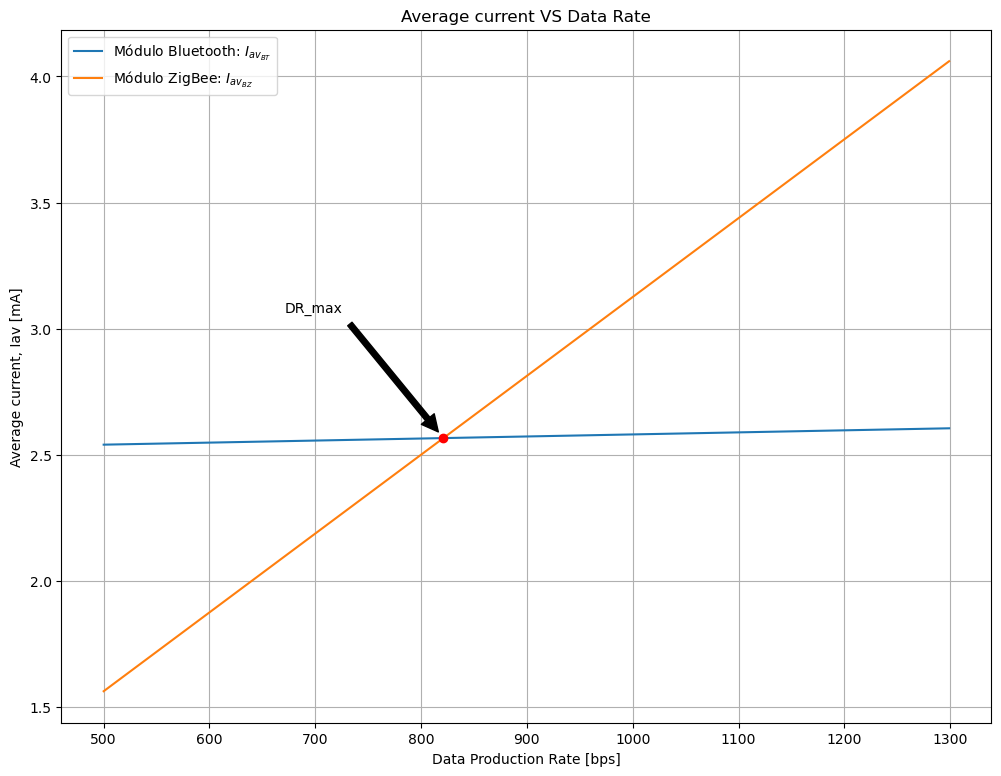

In [11]:
import matplotlib.pyplot as plt
DR_arr = np.arange(500,1300,1)
Iav_zb_arr = (DR_arr/b_zb)*(Iact_zb-Isleep_zb)+Isleep_zb
Iav_bt_arr = (DR_arr/b_bt)*(Iact_bt-Isleep_bt)+Isleep_bt

DR_max = (Isleep_bt-Isleep_zb)/((Iact_zb-Isleep_zb)/(b_zb)-(Iact_bt-Isleep_bt)/(b_bt))
Iav_th = DR_max/b_bt*(Iact_bt-Isleep_bt)+Isleep_bt

plt.figure(figsize=[12,9])
plt.plot(DR_arr,Iav_bt_arr*1e3, label='Módulo Bluetooth: $I_{av_{BT}}$')
plt.plot(DR_arr,Iav_zb_arr*1e3, label='Módulo ZigBee: $I_{av_{BZ}}$')
plt.plot(DR_max,Iav_th*1e3,'ro')
plt.annotate('DR_max', xy=(DR_max,Iav_th*1e3), xytext=(DR_max-150,Iav_th*1e3+0.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
plt.title("Average current VS Data Rate")
plt.ylabel('Average current, Iav [mA]')
plt.xlabel('Data Production Rate [bps]')
plt.legend()
plt.grid()
plt.show()

#### Condición de consumo:
* $I_{av_{ZB}}<I_{av_{BT}}$

* $\frac{DR}{b_{ZB}}·(I_{act_{ZB}}-I_{sleep_{ZB}})+I_{sleep_{ZB}} <
   \frac{DR}{b_{BT}}·(I_{act_{BT}}-I_{sleep_{BT}})+I_{sleep_{BT}}$

* $\boxed{DR < \frac{I_{sleep_{BT}} -I_{sleep_{ZB}}}{\frac{(I_{act_{ZB}}-I_{sleep_{ZB}})}{b_{ZB}} - \frac{(I_{act_{BT}}-I_{sleep_{BT}})}{b_{BT}}}=821,04\,bps\approx 821\ bps}$

#### Tasa efectiva mínima:
* $DR_{max} = \frac{I_{sleep_{BT}} -I_{sleep_{ZB}}}{\frac{(I_{act_{ZB}}-I_{sleep_{ZB}})}{b_{ZB}} - \frac{(I_{act_{BT}}-I_{sleep_{BT}})}{b_{BT}}}\approx 821\ bps$

In [12]:
DR_max = (Isleep_bt-Isleep_zb)/((Iact_zb-Isleep_zb)/(b_zb)-(Iact_bt-Isleep_bt)/(b_bt))
print(DR_max)

821.0403830948935


### Apartado e)
e) ¿Cuál es la tasa efectiva de datos mínima del enlace ZigBee para que la duración de la batería de los nodos sensores con comunicación ZigBee sea mayor que la de los nodos con comunicación Bluetooth?

### Solución

#### Condición de consumo:
* $I_{av_{ZB}}<I_{av_{BT}}$

* $\frac{DR}{b_{ZB}}·(I_{act_{ZB}}-I_{sleep_{ZB}})+I_{sleep_{ZB}} <
   \frac{DR}{b_{BT}}·(I_{act_{BT}}-I_{sleep_{BT}})+I_{sleep_{BT}}$

* $\boxed{b_{ZB} > \frac{DR·(I_{act_{ZB}}-I_{sleep_{ZB}} )}{\frac{DR}{b_{BT}}·(I_{act_{BT}}-I_{sleep_{BT}})+I_{sleep_{BT}}-I_{sleep_{ZB}}}= 18257,878\ bps \approx 18257,9\ bps}$

#### Tasa de efectiva de datos mínima del enlace ZigBee:
* $b_{ZB_{min}} = \frac{DR·(I_{act_{ZB}}-I_{sleep_{ZB}} )}{\frac{DR}{b_{BT}}·(I_{act_{BT}}-I_{sleep_{BT}})+I_{sleep_{BT}}-I_{sleep_{ZB}}}\approx 18257,9\ bps$

In [13]:
b_zb_min = DR*(Iact_zb-Isleep_zb)/((DR/b_bt)*(Iact_bt-Isleep_bt) + Isleep_bt - Isleep_zb)
print(b_zb_min)

18257.87771105685
